In [12]:
""" 
Statement : For a given dataset predict number of bikes getting shared based on temperature of the day
Dataset   : https://drive.google.com/open?id=1ohN2o3zSZ2Xuy4CIdTWN-dTmciUXizst
Solution  : Regression, Simple Linear Regression

"""

import pandas as pd
import numpy as np

bikedata=pd.read_csv("bike_sharing.csv")

print(bikedata[['temp','cnt','season']].head())
print(bikedata[['temp','cnt']].describe())
print(bikedata.shape)
print(bikedata.isnull().any())

   temp  cnt  season
0  0.24   16       1
1  0.22   40       1
2  0.22   32       1
3  0.24   13       1
4  0.24    1       1
               temp           cnt
count  17379.000000  17379.000000
mean       0.496987    189.463088
std        0.192556    181.387599
min        0.020000      1.000000
25%        0.340000     40.000000
50%        0.500000    142.000000
75%        0.660000    281.000000
max        1.000000    977.000000
(17379, 17)
instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


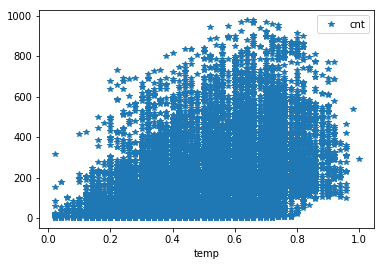

In [17]:
bikedata.plot(x='temp',y='cnt',style='*')

In [2]:
import matplotlib.pyplot as plt
# temp is a Temprature 
# cnt is a Number of bikes getting shared
bikedata.plot(x='temp',y='cnt',style='*') 
plt.title(" Prediction Temparature and Count of Bikes ")
plt.xlabel(' Temparature ')
plt.ylabel(' Number of Count ')
plt.show()


In [3]:
col=['temp','cnt']
for item in col:
    print(item,":-")
    print(bikedata[item].value_counts(),'\n')
from sklearn.model_selection import train_test_split # Split the data for training and spliting

x=bikedata['temp'].values.reshape(-1,1)
y=bikedata['cnt'].values.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

temp :-
0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
0.36    671
0.34    645
0.30    641
0.40    614
0.32    611
0.56    579
0.72    570
0.54    569
0.26    559
0.46    559
0.52    556
0.42    548
0.50    531
0.24    522
0.74    516
0.44    507
0.22    421
0.76    396
0.38    372
0.20    354
0.68    349
0.80    325
0.58    305
0.28    301
0.48    288
0.16    230
0.82    213
0.78    169
0.18    155
0.14    138
0.84    138
0.86    131
0.90     90
0.12     76
0.88     53
0.10     51
0.92     49
0.94     17
0.08     17
0.02     17
0.04     16
0.96     16
0.06     16
0.98      1
1.00      1
Name: temp, dtype: int64 

cnt :-
5      260
6      236
4      231
3      224
2      208
7      198
8      182
1      158
10     155
11     147
9      128
12     122
13     113
16     105
17     102
14      97
20      91
21      90
26      90
15      89
28      85
23      81
18      79
24      76
31      75
25      72
27      71
19      69
32      68
36      67
      ... 
754      1
977   

In [6]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train) # Salary data is trained with Linear Regression

print(regressor.intercept_) # value of intercept
print(regressor.coef_)      # value of sllop

# Compare actual value and prediction valuers

ypred=regressor.predict(x_test)
print((ypred))
compareValues=pd.DataFrame({'actualValues':y_test.flatten(),'Predicted ':ypred.flatten()})
print(compareValues)


# Manual Prediction
newValue=regressor.predict([[float(input("Enter the Temparature : "))]])
print("\n Number of bike rented for perticular temprature : ",newValue)


[0.57975464]
[[378.89438133]]
[[212.76060818]
 [167.29328242]
 [167.29328242]
 ...
 [235.49427106]
 [ 99.09229378]
 [114.24806904]]
      actualValues  Predicted 
0                7  212.760608
1                5  167.293282
2              743  167.293282
3              208   99.092294
4              333  250.650046
5              187  129.403844
6              124  114.248069
7              925  265.805822
8              212  190.026945
9              161  129.403844
10             253  273.383709
11             207  121.825957
12              64  167.293282
13             268  220.338496
14             114  235.494271
15             501  174.871170
16             480  159.715395
17             591  227.916383
18             275  235.494271
19             284  303.695260
20               5   76.358631
21             307  273.383709
22               4  227.916383
23               6  190.026945
24             431  235.494271
25              33   61.202856
26             505  303.695260
